#Portfolio Assets Allocation Optimization

# Function/Background

In [1115]:
#!pip install yfinance

In [1116]:
import pandas as pd
import yfinance as yf

In [1117]:
def fetch_data_from_yahoo(columns_of_firms, Enddate, Months_to_include):
  Stock = yf.download(columns_of_firms, start=Enddate - pd.DateOffset(months=Months_to_include+1), end=Enddate, interval="1mo")

# Filter only 'Adj Close' columns
  adj_close_columns = [col for col in Stock.columns if 'Adj Close' in col]
  Stock_adj_close = Stock[adj_close_columns]

# Filter only 'Adj Close' columns
  adj_close_columns = [col for col in Stock.columns if 'Close' in col]
  Stock_adj_close = Stock[adj_close_columns]

# Clean column names
  Stock_adj_close.columns = [col[1] for col in Stock_adj_close.columns]
  Stock = Stock_adj_close.reset_index()
  Stock = Stock.fillna("")
  Stock.iloc[:, 1:] = Stock.iloc[:, 1:].pct_change()
  Stock = Stock.dropna()
  Stock["Date"] = pd.to_datetime(Stock["Date"])
  return Stock

# Basic Data Input

In [1118]:
columns_of_firms = ["AAPL" ,"AMZN", "XOM", "GOOG", "META", "MSFT", "NVDA", "TSLA", "UNH", "CVS", "MNST", "BRK-B"]
columns_of_factors = ["SIZE",	"VLUE",	"MTUM",	"QUAL",	"USMV",	"DGRO"]

In [1119]:
Enddate = "2024-04-30"
Enddate = pd.to_datetime(Enddate)
Months_to_include = 60

# Data Collection and Organization

In [1120]:
Stock = fetch_data_from_yahoo(columns_of_firms, Enddate, Months_to_include)
Stock.index = Stock['Date'].values
Stock = Stock.drop(columns=['Date'])
Stock.head()

[*********************100%%**********************]  12 of 12 completed


,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,UNH,XOM
2019-05-01,-0.127573,-0.078613,-0.089013,-0.036962,-0.071394,-0.082368,0.037919,-0.052986,-0.251602,-0.224266,0.037457,-0.118460
2019-06-01,0.130519,0.066792,0.079779,0.040481,-0.020587,0.087508,0.031846,0.083118,0.212387,0.206848,0.009140,0.082803
2019-07-01,0.076394,-0.014179,-0.036309,0.025326,0.125607,0.006373,0.010027,0.017244,0.027340,0.081223,0.020491,-0.029623
2019-08-01,-0.020184,-0.048474,-0.009833,0.090388,-0.023490,-0.044071,-0.089964,0.011668,-0.007172,-0.066222,-0.060279,-0.079075
2019-09-01,0.072962,-0.022733,0.022664,0.035292,0.026008,-0.040879,-0.010397,0.008487,0.039162,0.067639,-0.071282,0.031104


In [1121]:
Factor = fetch_data_from_yahoo(columns_of_factors, Enddate, Months_to_include)
Factor.index = Factor['Date'].values
Factor = Factor.drop(columns=['Date'])
Factor.head()

[*********************100%%**********************]  6 of 6 completed


,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
2019-05-01,-0.057697,-0.021968,-0.065825,-0.069184,-0.016145,-0.096016
2019-06-01,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463
2019-07-01,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012
2019-08-01,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218
2019-09-01,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645


In [1122]:
Stock = Stock.merge(Factor, left_index=True, right_index=True)
Stock.head()

,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,UNH,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
2019-05-01,-0.127573,-0.078613,-0.089013,-0.036962,-0.071394,-0.082368,0.037919,-0.052986,-0.251602,-0.224266,0.037457,-0.118460,-0.057697,-0.021968,-0.065825,-0.069184,-0.016145,-0.096016
2019-06-01,0.130519,0.066792,0.079779,0.040481,-0.020587,0.087508,0.031846,0.083118,0.212387,0.206848,0.009140,0.082803,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463
2019-07-01,0.076394,-0.014179,-0.036309,0.025326,0.125607,0.006373,0.010027,0.017244,0.027340,0.081223,0.020491,-0.029623,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012
2019-08-01,-0.020184,-0.048474,-0.009833,0.090388,-0.023490,-0.044071,-0.089964,0.011668,-0.007172,-0.066222,-0.060279,-0.079075,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218
2019-09-01,0.072962,-0.022733,0.022664,0.035292,0.026008,-0.040879,-0.010397,0.008487,0.039162,0.067639,-0.071282,0.031104,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645


In [1123]:
import yfinance as yf

# Define the ticker symbols for Treasury bonds
Index = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500
# Fetch data
Index = yf.download(Index, start=Enddate - pd.DateOffset(months=Months_to_include+1), end=Enddate, interval="1mo")
# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Index.columns if 'Adj Close' in col]
Index_adj_close = Index[adj_close_columns]
# Clean column names
Index_adj_close.columns = [col[1] for col in Index_adj_close.columns]
Index = Index_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  3 of 3 completed

Column names cleaned and DataFrame reset.


In [1124]:
Index = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500
Index = fetch_data_from_yahoo(Index, Enddate, Months_to_include)
Index = Index.rename(columns = {"^IXIC": "NASDAQ", "^DJI":"Dow Jones", "^GSPC":"S&P 500"})
Index.head()

[*********************100%%**********************]  3 of 3 completed


,Date,Dow Jones,S&P 500,NASDAQ
1,2019-05-01,-0.066855,-0.065778,-0.079334
2,2019-06-01,0.071929,0.068930,0.074209
3,2019-07-01,0.009936,0.013128,0.021131
4,2019-08-01,-0.017160,-0.018092,-0.025997
5,2019-09-01,0.019450,0.017181,0.004579


In [1125]:
Stock['Index'] = Index['S&P 500'].values

In [1126]:
import yfinance as yf

# Define the ticker symbols for Treasury bonds
risk_free = ["^IRX", "^FVX", "^TNX", "^TYX"]  # 6-month T-bill, 5-year, 10-year, 30-year
# Fetch data
Risk_Free_Rate = yf.download(risk_free, start=Enddate - pd.DateOffset(months=Months_to_include), end=Enddate, interval="1mo")
# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Risk_Free_Rate.columns if 'Adj Close' in col]
Risk_Free_Rate_adj_close = Risk_Free_Rate[adj_close_columns]
# Clean column names
Risk_Free_Rate_adj_close.columns = [col[1] for col in Risk_Free_Rate_adj_close.columns]
Risk_Free_Rate = Risk_Free_Rate_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  4 of 4 completed

Column names cleaned and DataFrame reset.


In [1127]:
Risk_Free_Rate = Risk_Free_Rate.rename(columns = {"^IRX": "TB13W", "^FVX": "TB5", "^TNX": "TB10", "^TYX": "TB30"})
Risk_Free_Rate["Date"] = pd.to_datetime(Risk_Free_Rate["Date"])
Risk_Free_Rate.iloc[:, 1:] = Risk_Free_Rate.iloc[:, 1:]/100
Risk_Free_Rate = Risk_Free_Rate[['Date', 'TB13W', 'TB5', 'TB10', 'TB30']]
Risk_Free_Rate.tail()

,Date,TB13W,TB5,TB10,TB30
55,2023-12-01,0.05180,0.03840,0.03866,0.04019
56,2024-01-01,0.05188,0.03882,0.03967,0.04215
57,2024-02-01,0.05223,0.04262,0.04252,0.04375
58,2024-03-01,0.05203,0.04220,0.04206,0.04349
59,2024-04-01,0.05245,0.04723,0.04686,0.04790


In [1128]:
Stock['Risk_Free_Rate'] = Risk_Free_Rate['TB13W'].values/12
Stock.head()

,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,UNH,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index,Risk_Free_Rate
2019-05-01,-0.127573,-0.078613,-0.089013,-0.036962,-0.071394,-0.082368,0.037919,-0.052986,-0.251602,-0.224266,0.037457,-0.118460,-0.057697,-0.021968,-0.065825,-0.069184,-0.016145,-0.096016,-0.065778,0.001911
2019-06-01,0.130519,0.066792,0.079779,0.040481,-0.020587,0.087508,0.031846,0.083118,0.212387,0.206848,0.009140,0.082803,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463,0.068930,0.001696
2019-07-01,0.076394,-0.014179,-0.036309,0.025326,0.125607,0.006373,0.010027,0.017244,0.027340,0.081223,0.020491,-0.029623,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012,0.013128,0.001692
2019-08-01,-0.020184,-0.048474,-0.009833,0.090388,-0.023490,-0.044071,-0.089964,0.011668,-0.007172,-0.066222,-0.060279,-0.079075,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218,-0.018092,0.001611
2019-09-01,0.072962,-0.022733,0.022664,0.035292,0.026008,-0.040879,-0.010397,0.008487,0.039162,0.067639,-0.071282,0.031104,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645,0.017181,0.001475


In [1129]:
Stock.tail()

,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,UNH,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index,Risk_Free_Rate
2023-12-01,0.013583,0.040044,-0.009278,0.162031,0.052345,0.081950,0.044606,-0.007574,0.058841,0.034988,-0.047923,-0.026864,0.041812,0.045167,0.043028,0.070373,0.022004,0.068780,0.044229,0.004317
2024-01-01,-0.042227,0.021456,0.075927,-0.058131,0.006173,0.102215,-0.044957,0.057281,0.242418,-0.246257,-0.027979,0.028306,0.012635,0.055835,0.022835,-0.009024,0.021658,-0.008501,0.015896,0.004323
2024-02-01,-0.019794,0.138918,0.066868,0.000000,-0.014245,0.256293,0.074155,0.040394,0.285809,0.077901,-0.035448,0.016633,0.030826,0.099970,0.064983,0.047980,0.020948,0.025224,0.051721,0.004353
2024-03-01,-0.051286,0.020480,0.027162,0.072475,0.089283,-0.009283,0.003046,0.017116,0.142128,-0.129235,0.002229,0.112132,0.033464,0.028209,0.025393,0.038992,0.026908,0.053292,0.031019,0.004336
2024-04-01,-0.006706,-0.029826,-0.056573,-0.151078,0.081308,-0.114111,-0.098347,-0.074610,-0.043760,0.042608,-0.022236,0.017464,-0.036342,-0.054657,-0.044965,-0.053061,-0.037449,-0.067953,-0.041615,0.004371


In [1130]:
Excess_Returns = Stock.apply(lambda x: x - Stock["Risk_Free_Rate"] if x.name not in ["Risk_Free_Rate"] else x)
Excess_Returns.head()

,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,UNH,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index,Risk_Free_Rate
2019-05-01,-0.129483,-0.080524,-0.090924,-0.038873,-0.073305,-0.084279,0.036009,-0.054897,-0.253513,-0.226177,0.035546,-0.120371,-0.059608,-0.023879,-0.067736,-0.071095,-0.018056,-0.097927,-0.067689,0.001911
2019-06-01,0.128823,0.065096,0.078083,0.038785,-0.022282,0.085812,0.030150,0.081422,0.210691,0.205152,0.007444,0.081108,0.061483,0.055439,0.063643,0.068515,0.042628,0.085767,0.067234,0.001696
2019-07-01,0.074703,-0.015871,-0.038001,0.023634,0.123915,0.004681,0.008335,0.015552,0.025648,0.079531,0.018799,-0.031314,0.012444,0.016268,0.012083,0.010396,0.014994,0.014320,0.011436,0.001692
2019-08-01,-0.021795,-0.050085,-0.011444,0.088778,-0.025101,-0.045682,-0.091575,0.010057,-0.008783,-0.067833,-0.061890,-0.080686,-0.015292,0.001040,-0.019404,-0.036139,0.014323,-0.046828,-0.019702,0.001611
2019-09-01,0.071487,-0.024208,0.021189,0.033817,0.024533,-0.042354,-0.011872,0.007012,0.037687,0.066164,-0.072757,0.029629,0.022864,-0.016345,0.013018,0.019443,0.003857,0.040170,0.015706,0.001475


# Regression

In [1131]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf #this will have linear regression and logistic regression modules

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed
columns_to_exclude = ["Risk_Free_Rate"]

# Create DataFrames to store predicted values, residuals, and intercepts
Market_Beta = pd.DataFrame()
Factor_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, and intercept
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name

        # Store results in the appropriate DataFrame
        if column in columns_of_firms:
            Market_Beta[f"{column}_Predicted"] = predicted_values
            Market_Beta[f"{column}_Residuals"] = residuals
            Market_Beta[f"{column}_Intercept"] = intercept

        elif column in columns_of_factors:
            Factor_Market_Beta[f"{column}_Predicted"] = predicted_values
            Factor_Market_Beta[f"{column}_Residuals"] = residuals
            Factor_Market_Beta[f"{column}_Intercept"] = intercept

In [1132]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed
columns_to_exclude = ["Risk_Free_Rate"]

# Create DataFrames to store predicted values, residuals, intercepts, and slopes
Market_Beta = pd.DataFrame()
Factor_Market_Beta = pd.DataFrame()
Slopes_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, intercept, and slope
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name
        slope = model.params[1]  # Access the slope for VTI

        # Store results in the appropriate DataFrames
        if column in columns_of_firms:
            Market_Beta[f"{column}_Predicted"] = predicted_values
            Market_Beta[f"{column}_Residuals"] = residuals
            Market_Beta[f"{column}_Intercept"] = intercept

        elif column in columns_of_factors:
            Factor_Market_Beta[f"{column}_Predicted"] = predicted_values
            Factor_Market_Beta[f"{column}_Residuals"] = residuals
            Factor_Market_Beta[f"{column}_Intercept"] = intercept

In [1133]:
Market_Beta.head()

,AAPL_Predicted,AAPL_Residuals,AAPL_Intercept,AMZN_Predicted,AMZN_Residuals,AMZN_Intercept,BRK-B_Predicted,BRK-B_Residuals,BRK-B_Intercept,CVS_Predicted,...,NVDA_Intercept,TSLA_Predicted,TSLA_Residuals,TSLA_Intercept,UNH_Predicted,UNH_Residuals,UNH_Intercept,XOM_Predicted,XOM_Residuals,XOM_Intercept
2019-05-01,-0.074592,-0.054892,0.011504,-0.075388,-0.005136,0.002562,-0.057920,-0.033004,0.002431,-0.038448,...,0.044278,-0.124262,-0.101915,0.040524,-0.031140,0.066686,0.00741,-0.062832,-0.057539,0.001421
2019-06-01,0.097021,0.031802,0.011504,0.079989,-0.014893,0.002562,0.062376,0.015707,0.002431,0.037358,...,0.044278,0.204204,0.000948,0.040524,0.045702,-0.038258,0.00741,0.065242,0.015865,0.001421
2019-07-01,0.026050,0.048653,0.011504,0.015732,-0.031603,0.002562,0.012627,-0.050628,0.002431,0.006008,...,0.044278,0.068366,0.011165,0.040524,0.013923,0.004876,0.00741,0.012277,-0.043591,0.001421
2019-08-01,-0.013556,-0.008238,0.011504,-0.020127,-0.029957,0.002562,-0.015136,0.003692,0.002431,-0.011487,...,0.044278,-0.007441,-0.060392,0.040524,-0.003811,-0.058078,0.00741,-0.017282,-0.063404,0.001421
2019-09-01,0.031481,0.040006,0.011504,0.020649,-0.044857,0.002562,0.016434,0.004755,0.002431,0.008407,...,0.044278,0.078761,-0.012597,0.040524,0.016355,-0.089112,0.00741,0.016330,0.013299,0.001421


In [1134]:
Factor_Market_Beta.head()

,DGRO_Predicted,DGRO_Residuals,DGRO_Intercept,MTUM_Predicted,MTUM_Residuals,MTUM_Intercept,QUAL_Predicted,QUAL_Residuals,QUAL_Intercept,SIZE_Predicted,SIZE_Residuals,SIZE_Intercept,USMV_Predicted,USMV_Residuals,USMV_Intercept,VLUE_Predicted,VLUE_Residuals,VLUE_Intercept
2019-05-01,-0.062999,0.003391,-0.001891,-0.064242,0.040363,-0.001005,-0.070154,0.002418,-0.000175,-0.076398,0.005303,-0.002832,-0.053223,0.035167,-0.002426,-0.077122,-0.020805,-0.005559
2019-06-01,0.058807,0.002675,-0.001891,0.061808,-0.006369,-0.001005,0.069334,-0.005690,-0.000175,0.070240,-0.001726,-0.002832,0.048030,-0.005402,-0.002426,0.065524,0.020243,-0.005559
2019-07-01,0.008434,0.004011,-0.001891,0.009680,0.006588,-0.001005,0.011648,0.000435,-0.000175,0.009598,0.000799,-0.002832,0.006157,0.008837,-0.002426,0.006532,0.007788,-0.005559
2019-08-01,-0.019678,0.004386,-0.001891,-0.019412,0.020451,-0.001005,-0.020544,0.001140,-0.000175,-0.024245,-0.011893,-0.002832,-0.017212,0.031534,-0.002426,-0.026389,-0.020439,-0.005559
2019-09-01,0.012288,0.010576,-0.001891,0.013669,-0.030013,-0.001005,0.016062,-0.003044,-0.000175,0.014238,0.005205,-0.002832,0.009361,-0.005503,-0.002426,0.011046,0.029124,-0.005559


In [1135]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime, timedelta

# Assuming 'your_table' is your DataFrame

# Create DataFrames to store predicted values, residuals, and intercepts
Organized_Market_Beta = pd.DataFrame()
Organized_Factor_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['Index'])


# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, and intercept
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name

        # Store results in the appropriate DataFrame
        if column in columns_of_firms:
            # Add time information
            Organized_Market_Beta[f"{column}_Organized_Data"] = residuals + intercept

        elif column in columns_of_factors:
            # Add time information
            Organized_Factor_Market_Beta[f"{column}_Organized_Data"] = residuals + intercept

In [1136]:
Organized_Market_Beta.head()

,AAPL_Organized_Data,AMZN_Organized_Data,BRK-B_Organized_Data,CVS_Organized_Data,GOOG_Organized_Data,META_Organized_Data,MNST_Organized_Data,MSFT_Organized_Data,NVDA_Organized_Data,TSLA_Organized_Data,UNH_Organized_Data,XOM_Organized_Data
2019-05-01,-0.043388,-0.002574,-0.030574,-0.000842,-0.004079,-0.003669,0.085903,0.005513,-0.136152,-0.061391,0.074096,-0.056118
2019-06-01,0.043306,-0.012331,0.018138,0.001010,-0.091044,0.005742,-0.019409,0.021417,0.094118,0.041472,-0.030848,0.017286
2019-07-01,0.060156,-0.029041,-0.048197,0.017208,0.112219,-0.008938,-0.000095,0.005346,0.005819,0.051689,0.012286,-0.042170
2019-08-01,0.003265,-0.027395,0.006123,0.099847,-0.004951,-0.022219,-0.077052,0.027641,0.025378,-0.019868,-0.050668,-0.061983
2019-09-01,0.051509,-0.042295,0.007185,0.024993,0.008470,-0.061058,-0.023449,-0.007005,0.010455,0.027928,-0.081702,0.014720


In [1137]:
Organized_Factor_Market_Beta.head()

,DGRO_Organized_Data,MTUM_Organized_Data,QUAL_Organized_Data,SIZE_Organized_Data,USMV_Organized_Data,VLUE_Organized_Data
2019-05-01,0.001500,0.039358,0.002242,0.002471,0.032741,-0.026364
2019-06-01,0.000784,-0.007374,-0.005866,-0.004558,-0.007828,0.014684
2019-07-01,0.002120,0.005583,0.000260,-0.002033,0.006411,0.002229
2019-08-01,0.002495,0.019447,0.000965,-0.014725,0.029109,-0.025998
2019-09-01,0.008685,-0.031018,-0.003220,0.002373,-0.007929,0.023565


In [1138]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame to store predicted values, residuals, and intercepts
Factor_Beta = pd.DataFrame()
columns_to_exclude = ["Risk_Free_Rate"]

# Prepare the design matrix (X) factors
X = sm.add_constant(Organized_Factor_Market_Beta)

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:
  if column not in columns_to_exclude:

    # Get the target variable (y)
     y = Organized_Market_Beta[column]

    # Perform linear regression using statsmodels
     model = sm.OLS(y, X).fit()

    # Get predicted values, residuals, and intercept
     predicted_values = model.predict(X)
     residuals = model.resid
     intercept = model.params[0]  # Access the intercept without specifying the variable name

    # Store results in the appropriate DataFrame
     Factor_Beta[f"{column}_Predicted"] = predicted_values
     Factor_Beta[f"{column}_Residuals"] = residuals
     Factor_Beta[f"{column}_Intercept"] = intercept

In [1139]:
Factor_Beta.head()

,AAPL_Organized_Data_Predicted,AAPL_Organized_Data_Residuals,AAPL_Organized_Data_Intercept,AMZN_Organized_Data_Predicted,AMZN_Organized_Data_Residuals,AMZN_Organized_Data_Intercept,BRK-B_Organized_Data_Predicted,BRK-B_Organized_Data_Residuals,BRK-B_Organized_Data_Intercept,CVS_Organized_Data_Predicted,...,NVDA_Organized_Data_Intercept,TSLA_Organized_Data_Predicted,TSLA_Organized_Data_Residuals,TSLA_Organized_Data_Intercept,UNH_Organized_Data_Predicted,UNH_Organized_Data_Residuals,UNH_Organized_Data_Intercept,XOM_Organized_Data_Predicted,XOM_Organized_Data_Residuals,XOM_Organized_Data_Intercept
2019-05-01,-0.029735,-0.013653,0.002593,-0.032088,0.029514,-0.008739,-0.007195,-0.023379,0.002685,-0.011075,...,0.033373,-0.028091,-0.033300,0.019094,0.024116,0.049980,0.005818,-0.045353,-0.010765,0.008404
2019-06-01,0.022969,0.020337,0.002593,-0.005758,-0.006573,-0.008739,0.011817,0.006321,0.002685,0.017994,...,0.033373,0.040778,0.000694,0.019094,-0.000838,-0.030010,0.005818,0.046459,-0.029173,0.008404
2019-07-01,-0.003298,0.063454,0.002593,-0.022206,-0.006835,-0.008739,0.006619,-0.054816,0.002685,0.008396,...,0.033373,-0.014798,0.066487,0.019094,0.008244,0.004042,0.005818,0.011342,-0.053512,0.008404
2019-08-01,0.005725,-0.002459,0.002593,-0.024119,-0.003276,-0.008739,0.007797,-0.001674,0.002685,-0.001548,...,0.033373,-0.036171,0.016303,0.019094,0.037259,-0.087927,0.005818,-0.032845,-0.029138,0.008404
2019-09-01,0.013617,0.037893,0.002593,-0.030728,-0.011567,-0.008739,0.012580,-0.005395,0.002685,0.035041,...,0.033373,-0.004996,0.032923,0.019094,0.015115,-0.096817,0.005818,0.058314,-0.043594,0.008404


In [1140]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame to store predicted values, residuals, and intercepts
Firm_Residues = pd.DataFrame()

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:

    # Store results in the appropriate DataFrame
    Firm_Residues[f"{column}_Residuals"] = Factor_Beta[f"{column}_Residuals"] + Factor_Beta[f"{column}_Intercept"]

In [1141]:
Firm_Residues.head()

,AAPL_Organized_Data_Residuals,AMZN_Organized_Data_Residuals,BRK-B_Organized_Data_Residuals,CVS_Organized_Data_Residuals,GOOG_Organized_Data_Residuals,META_Organized_Data_Residuals,MNST_Organized_Data_Residuals,MSFT_Organized_Data_Residuals,NVDA_Organized_Data_Residuals,TSLA_Organized_Data_Residuals,UNH_Organized_Data_Residuals,XOM_Organized_Data_Residuals
2019-05-01,-0.011060,0.020775,-0.020694,0.014373,-0.002149,0.026040,0.054653,0.001290,-0.055187,-0.014206,0.055798,-0.002361
2019-06-01,0.022930,-0.015312,0.009006,-0.012844,-0.083564,0.025714,0.000380,0.020567,0.097058,0.019788,-0.024192,-0.020769
2019-07-01,0.066047,-0.015574,-0.052131,0.012953,0.116677,0.003222,-0.000917,0.003564,0.019623,0.085581,0.009860,-0.045108
2019-08-01,0.000134,-0.012015,0.001011,0.105536,-0.002479,-0.008258,-0.097270,0.004911,0.088724,0.035397,-0.082110,-0.020733
2019-09-01,0.040486,-0.020306,-0.002710,-0.005908,0.014912,-0.059547,-0.017976,0.008723,0.039743,0.052018,-0.091000,-0.035190


# Beta

In [1142]:
# Create a DataFrame to store coefficients
Factor_Beta = pd.DataFrame()

X = sm.add_constant(Organized_Factor_Market_Beta)


# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:
    if column not in columns_to_exclude:

        # Get the target variable (y)
        y = Organized_Market_Beta[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get coefficients and intercept
        coefficients = model.params[1:]  # Exclude the intercept

        # Store coefficients in the appropriate DataFrame
        Factor_Beta[column] = coefficients

# Transpose the DataFrame
Factor_Beta = Factor_Beta.T

# Set the first row as the header
Factor_Beta.columns = X.columns[1:]

# Rename the index column
Factor_Beta = Factor_Beta.rename_axis('Factor').reset_index()
Factor_Beta.columns = [col.replace('_Organized_Data', '') for col in Factor_Beta.columns]

In [1143]:
Factor_Beta = Factor_Beta.drop(columns=Factor_Beta.columns[0])
Factor_Beta.head()

,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
0,-0.102775,-0.472962,-2.495248,-1.224426,-0.576349,-0.528457
1,-2.795097,-0.275887,-1.174599,-0.086538,-0.689904,-0.650060
2,1.160023,0.181799,0.131863,-0.952596,-0.318598,0.238422
3,2.003154,-0.080061,-0.768238,-0.259017,-0.102966,0.354098
4,-1.435420,-0.443406,0.444679,0.355636,0.327211,-0.192925


In [1144]:
# Create a DataFrame to store slopes for each output in Market_Beta
Slopes_Market_Beta = pd.DataFrame(index=[0])
columns_to_exclude = ["Year", "Month", "T-Bill"]


# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get the slope for VTI
        slope = model.params[1]  # Access the slope for VTI

        # Store the slope value in the appropriate DataFrame
        Slopes_Market_Beta.at[0, f"{column}"] = slope

In [1145]:
Slopes_Market_Beta.head()

,AAPL,AMZN,BRK-B,CVS,GOOG,META,MNST,MSFT,NVDA,TSLA,UNH,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index,Risk_Free_Rate
0,1.271933,1.151592,0.891588,0.56185,1.02271,1.190901,0.737114,0.89247,1.73384,2.434471,0.569525,0.949243,0.902787,0.93424,1.033832,1.086832,0.750448,1.057243,1.0,-0.000737


In [1146]:
# Rename the first column to remove "Organized_Data"
Slopes_Market_Beta.columns = [col.replace("_Organized_Data", "") for col in Slopes_Market_Beta.columns]

# Select the desired columns
Slopes_Market_Beta = Slopes_Market_Beta[columns_of_firms]

In [1147]:
Slopes_Market_Beta.head()

,AAPL,AMZN,XOM,GOOG,META,MSFT,NVDA,TSLA,UNH,CVS,MNST,BRK-B
0,1.271933,1.151592,0.949243,1.02271,1.190901,0.89247,1.73384,2.434471,0.569525,0.56185,0.737114,0.891588


In [1148]:
Slopes_Market_Beta = Slopes_Market_Beta.T
Slopes_Market_Beta.columns = ["VIT"]
Slopes_Market_Beta.update(Factor_Beta)

In [1149]:
# Iterate over columns in Slopes_Market_Beta
for column in Factor_Beta.columns:
    # Check if the column exists in Beta
      Slopes_Market_Beta[column] = Factor_Beta[column].values
Beta = Slopes_Market_Beta

In [1150]:
Beta.head()

,VIT,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
AAPL,1.271933,-0.102775,-0.472962,-2.495248,-1.224426,-0.576349,-0.528457
AMZN,1.151592,-2.795097,-0.275887,-1.174599,-0.086538,-0.689904,-0.650060
XOM,0.949243,1.160023,0.181799,0.131863,-0.952596,-0.318598,0.238422
GOOG,1.022710,2.003154,-0.080061,-0.768238,-0.259017,-0.102966,0.354098
META,1.190901,-1.435420,-0.443406,0.444679,0.355636,0.327211,-0.192925


# Covariance Matrix

In [1151]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed


market_covariance_matrix = Excess_Returns[columns_of_firms].cov()
market_covariance_matrix = market_covariance_matrix*12

index_variance = pd.DataFrame({'Index': [Excess_Returns['Index'].var() * 12]})

factor_covariance_matrix = Organized_Factor_Market_Beta.cov()
factor_covariance_matrix = factor_covariance_matrix*12
factor_covariance_matrix = pd.concat([factor_covariance_matrix, index_variance])
factor_covariance_matrix = factor_covariance_matrix.fillna(0)
# Swap last column with first column
factor_covariance_matrix = factor_covariance_matrix[[factor_covariance_matrix.columns[-1]] + list(factor_covariance_matrix.columns[:-1])]

# Swap last row with first row
factor_covariance_matrix = factor_covariance_matrix.reindex([factor_covariance_matrix.index[-1]] + list(factor_covariance_matrix.index[:-1]))
factor_covariance_matrix.index = ["Index"] + list(factor_covariance_matrix.index[1:])

In [1152]:
factor_covariance_matrix

,Index,DGRO_Organized_Data,MTUM_Organized_Data,QUAL_Organized_Data,SIZE_Organized_Data,USMV_Organized_Data,VLUE_Organized_Data
Index,0.034109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DGRO_Organized_Data,0.000000,0.002410,-0.000281,-0.000054,0.001319,0.001316,0.003243
MTUM_Organized_Data,0.000000,-0.000281,0.007858,-0.000256,-0.000414,0.001101,-0.002252
QUAL_Organized_Data,0.000000,-0.000054,-0.000256,0.000787,-0.000199,0.000228,-0.000517
SIZE_Organized_Data,0.000000,0.001319,-0.000414,-0.000199,0.003118,-0.000012,0.003741
USMV_Organized_Data,0.000000,0.001316,0.001101,0.000228,-0.000012,0.003096,-0.000184
VLUE_Organized_Data,0.000000,0.003243,-0.002252,-0.000517,0.003741,-0.000184,0.009168


In [1153]:
market_covariance_matrix

,AAPL,AMZN,XOM,GOOG,META,MSFT,NVDA,TSLA,UNH,CVS,MNST,BRK-B
AAPL,0.091448,0.068448,0.025219,0.045064,0.050942,0.047372,0.086463,0.173149,0.024152,0.015435,0.032484,0.033815
AMZN,0.068448,0.106488,0.011990,0.054523,0.066082,0.049151,0.107811,0.163091,0.012537,0.001691,0.022155,0.027391
XOM,0.025219,0.011990,0.120643,0.024203,0.001201,0.012864,0.011276,0.028005,0.020005,0.022834,0.012506,0.038615
GOOG,0.045064,0.054523,0.024203,0.074046,0.051035,0.038678,0.075663,0.101542,0.018148,0.009561,0.023220,0.025446
META,0.050942,0.066082,0.001201,0.051035,0.168236,0.050146,0.115076,0.111778,0.009442,0.018234,0.034162,0.030883
MSFT,0.047372,0.049151,0.012864,0.038678,0.050146,0.048389,0.073328,0.095480,0.018080,0.009904,0.019605,0.023044
NVDA,0.086463,0.107811,0.011276,0.075663,0.115076,0.073328,0.260633,0.191486,0.005995,0.001763,0.028541,0.050190
TSLA,0.173149,0.163091,0.028005,0.101542,0.111778,0.095480,0.191486,0.597228,0.040512,0.017330,0.048777,0.058250
UNH,0.024152,0.012537,0.020005,0.018148,0.009442,0.018080,0.005995,0.040512,0.047239,0.024575,0.020009,0.018477
CVS,0.015435,0.001691,0.022834,0.009561,0.018234,0.009904,0.001763,0.017330,0.024575,0.063266,0.013931,0.020119


In [1154]:
import pandas as pd
import numpy as np

One_Factor_Model_Resuduals = Organized_Market_Beta.var()
df = pd.DataFrame(One_Factor_Model_Resuduals)

# Extract column and index names
columns_and_index = df.index.tolist()

# Create a square matrix with 0s
matrix_size = len(columns_and_index)
result_matrix = np.zeros((matrix_size, matrix_size))

# Fill the diagonal with the values from the DataFrame
np.fill_diagonal(result_matrix, df.iloc[:, 0])

# Create a new DataFrame with the matrix and set column and index names
One_Factor_Model_Resuduals = pd.DataFrame(result_matrix, columns=columns_and_index, index=columns_and_index)
One_Factor_Model_Resuduals = One_Factor_Model_Resuduals*12

In [1155]:
One_Factor_Model_Resuduals.head(12)

,AAPL_Organized_Data,AMZN_Organized_Data,BRK-B_Organized_Data,CVS_Organized_Data,GOOG_Organized_Data,META_Organized_Data,MNST_Organized_Data,MSFT_Organized_Data,NVDA_Organized_Data,TSLA_Organized_Data,UNH_Organized_Data,XOM_Organized_Data
AAPL_Organized_Data,0.036266,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AMZN_Organized_Data,0.000000,0.061254,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BRK-B_Organized_Data,0.000000,0.000000,0.015525,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVS_Organized_Data,0.000000,0.000000,0.000000,0.052498,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOOG_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.03837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
META_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.00000,0.119861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MNST_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.033066,0.000000,0.000000,0.000000,0.000000,0.000000
MSFT_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.021221,0.000000,0.000000,0.000000,0.000000
NVDA_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.158094,0.000000,0.000000,0.000000
TSLA_Organized_Data,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.395074,0.000000,0.000000


In [1156]:
One_Factor = pd.DataFrame(Beta.iloc[:, 0])
One_Factor = One_Factor.T.values * One_Factor.values
One_Factor = pd.DataFrame(One_Factor)
One_Factor = One_Factor * factor_covariance_matrix.iloc[0,0]
One_Factor = One_Factor.values + One_Factor_Model_Resuduals.values
One_Factor = pd.DataFrame(One_Factor, index=columns_of_firms, columns=columns_of_firms)
One_Factor

,AAPL,AMZN,XOM,GOOG,META,MSFT,NVDA,TSLA,UNH,CVS,MNST,BRK-B
AAPL,0.091448,0.049961,0.041182,0.044370,0.051667,0.038719,0.075222,0.105618,0.024709,0.024376,0.031979,0.038681
AMZN,0.049961,0.106488,0.037286,0.040172,0.046778,0.035056,0.068105,0.095626,0.022371,0.022069,0.028954,0.035021
XOM,0.041182,0.037286,0.046259,0.033113,0.038559,0.028896,0.056138,0.078823,0.018440,0.018191,0.023866,0.028868
GOOG,0.044370,0.040172,0.033113,0.088174,0.041543,0.031133,0.060483,0.084924,0.019867,0.019599,0.025713,0.031102
META,0.051667,0.046778,0.038559,0.041543,0.086745,0.036253,0.070430,0.098890,0.023134,0.022823,0.029942,0.036217
MSFT,0.038719,0.035056,0.028896,0.031133,0.036253,0.147029,0.052781,0.074109,0.017337,0.017103,0.022439,0.027141
NVDA,0.075222,0.068105,0.056138,0.060483,0.070430,0.052781,0.135605,0.143974,0.033682,0.033228,0.043593,0.052728
TSLA,0.105618,0.095626,0.078823,0.084924,0.098890,0.074109,0.143974,0.223374,0.047292,0.046655,0.061208,0.074036
UNH,0.024709,0.022371,0.018440,0.019867,0.023134,0.017337,0.033682,0.047292,0.169157,0.010915,0.014319,0.017320
CVS,0.024376,0.022069,0.018191,0.019599,0.022823,0.017103,0.033228,0.046655,0.010915,0.405842,0.014126,0.017087


In [1157]:
import pandas as pd
import numpy as np

Multi_Factor_Model_Resuduals = Firm_Residues.var()
df = pd.DataFrame(Multi_Factor_Model_Resuduals)
columns_and_index = df.index.tolist()
matrix_size = len(columns_and_index)
result_matrix = np.zeros((matrix_size, matrix_size))
np.fill_diagonal(result_matrix, df.iloc[:, 0])
Multi_Factor_Model_Resuduals = pd.DataFrame(result_matrix, columns=columns_and_index, index=columns_and_index)
Multi_Factor_Model_Resuduals = Multi_Factor_Model_Resuduals*12

In [1158]:
Multi_Factor_Model_Resuduals.head(20)

,AAPL_Organized_Data_Residuals,AMZN_Organized_Data_Residuals,BRK-B_Organized_Data_Residuals,CVS_Organized_Data_Residuals,GOOG_Organized_Data_Residuals,META_Organized_Data_Residuals,MNST_Organized_Data_Residuals,MSFT_Organized_Data_Residuals,NVDA_Organized_Data_Residuals,TSLA_Organized_Data_Residuals,UNH_Organized_Data_Residuals,XOM_Organized_Data_Residuals
AAPL_Organized_Data_Residuals,0.019356,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
AMZN_Organized_Data_Residuals,0.000000,0.019435,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
BRK-B_Organized_Data_Residuals,0.000000,0.000000,0.012445,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
CVS_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.038314,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
GOOG_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.032586,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
META_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.09034,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
MNST_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.028133,0.00000,0.000000,0.00000,0.000000,0.000000
MSFT_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.01046,0.000000,0.00000,0.000000,0.000000
NVDA_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.060179,0.00000,0.000000,0.000000
TSLA_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.24396,0.000000,0.000000


In [1159]:
Multi_Factor = factor_covariance_matrix.values @ Beta.T.values
Multi_Factor = Beta @ Multi_Factor
Multi_Factor = Multi_Factor.values + Multi_Factor_Model_Resuduals.values
Multi_Factor = pd.DataFrame(Multi_Factor, index=columns_of_firms, columns=columns_of_firms)

In [1160]:
Multi_Factor

,AAPL,AMZN,XOM,GOOG,META,MSFT,NVDA,TSLA,UNH,CVS,MNST,BRK-B
AAPL,0.091448,0.070781,0.040078,0.036563,0.056341,0.046757,0.070671,0.115217,0.039297,0.062990,0.030959,0.030569
AMZN,0.070781,0.106488,0.030281,0.018357,0.059170,0.056159,0.061309,0.111675,0.068374,0.091745,0.018600,0.011399
XOM,0.040078,0.030281,0.046259,0.037539,0.035297,0.024917,0.055892,0.077947,0.012595,0.005589,0.026885,0.033654
GOOG,0.036563,0.018357,0.037539,0.088174,0.034013,0.017222,0.062210,0.075108,-0.009142,-0.010577,0.031377,0.049487
META,0.056341,0.059170,0.035297,0.034013,0.086745,0.047274,0.070380,0.103642,0.039309,0.038138,0.026773,0.026455
MSFT,0.046757,0.056159,0.024917,0.017222,0.047274,0.147029,0.054036,0.084770,0.058842,0.032492,0.019625,0.005342
NVDA,0.070671,0.061309,0.055892,0.062210,0.070380,0.054036,0.135605,0.141996,0.024159,0.018209,0.047863,0.050162
TSLA,0.115217,0.111675,0.077947,0.075108,0.103642,0.084770,0.141996,0.223374,0.068961,0.065006,0.059954,0.059671
UNH,0.039297,0.068374,0.012595,-0.009142,0.039309,0.058842,0.024159,0.068961,0.169157,0.058194,-0.003928,-0.015555
CVS,0.062990,0.091745,0.005589,-0.010577,0.038138,0.032492,0.018209,0.065006,0.058194,0.405842,-0.003520,-0.006950


# Portfolio Optimization

In [1161]:
import yfinance as yf
import pandas as pd

def get_market_cap(symbols):
    data = {}
    for symbol in symbols:
        try:
            info = yf.Ticker(symbol).info
            market_cap = info.get("marketCap", "N/A")
            data[symbol] = market_cap
        except:
            data[symbol] = "N/A"
    return data

market_cap_data = get_market_cap(columns_of_firms)
MV = pd.DataFrame(market_cap_data.values(), index=market_cap_data.keys(), columns=["MarketCap"])
MV = MV[MV['MarketCap'] != 'N/A']
MV['MarketCap'] = pd.to_numeric(MV['MarketCap'])
MV['Weight'] = MV['MarketCap'] / MV['MarketCap'].sum()
"""
Market_Risk_Premium = 0.06
Market_Volatility = 0.1953
"""

'\nMarket_Risk_Premium = 0.06\nMarket_Volatility = 0.1953\n'

In [1162]:
Market_Risk_Premium = Excess_Returns['Index'].mean()*12
Market_Volatility = Excess_Returns['Index'].std()*np.sqrt(12)
print(f"Market_Risk_Premium is {Market_Risk_Premium.round(3)}\nMarket_Volatility is {Market_Volatility.round(3)}")

Market_Risk_Premium is 0.104
Market_Volatility is 0.185


In [1163]:
MV['Sample Data'] = (market_covariance_matrix @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['One Factor'] = (One_Factor @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['Multi Factor'] = (Multi_Factor @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['MarketCap'] = (MV['MarketCap']/1000000).round(3)

In [1164]:
MV

,MarketCap,Weight,Sample Data,One Factor,Multi Factor
AAPL,2796939.641,0.175507,0.198587,0.176944,0.186693
AMZN,1964349.719,0.123262,0.213279,0.165634,0.181959
XOM,524364.644,0.032904,0.064092,0.119171,0.114654
GOOG,2125803.160,0.133393,0.160748,0.148002,0.126199
META,1187704.734,0.074528,0.208278,0.156251,0.166854
MSFT,3042341.552,0.190905,0.147824,0.180115,0.190641
NVDA,2263849.894,0.142055,0.329341,0.229110,0.223897
TSLA,567071.605,0.035583,0.439374,0.303945,0.317152
UNH,460923.273,0.028923,0.054311,0.084463,0.118044
CVS,69974.327,0.004391,0.034049,0.074889,0.115932


In [1165]:
len(MV)

12

In [1166]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Initial weights (equal distribution)
initial_weights = np.array([1/len(MV)]*len(MV))
cov_matrix = market_covariance_matrix

# Define upper and lower limits for each weight
lower_limits = [0.05] * len(initial_weights)  # Example lower limits
upper_limits = [0.40] * len(initial_weights)   # Example upper limits

# Combine lower and upper limits
bounds_with_limits = [(lower_limits[i], upper_limits[i]) for i in range(len(initial_weights))]

# Define the objective function to minimize (negative Sharpe Ratio)
def negative_sharpe(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility

# Constraints: weights must sum to 1 and be non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},)
bounds = tuple((0, 1) for _ in initial_weights)

# Optimization
sampe_data = minimize(negative_sharpe, initial_weights, args=(MV['Sample Data'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)
one_factor = minimize(negative_sharpe, initial_weights, args=(MV['One Factor'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)
multi_factor = minimize(negative_sharpe, initial_weights, args=(MV['Multi Factor'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)

# Optimized weights
optimized_weights_sample_data = sampe_data.x
optimized_weights_one_factor = one_factor.x
optimized_weights_multi_factor = multi_factor.x

# Calculate optimized Sharpe Ratio
optimized_sharpe_sample_data = -sampe_data.fun
optimized_sharpe_one_factor = -one_factor.fun
optimized_sharpe_multi_factor = -multi_factor.fun

In [1167]:
Weight = pd.DataFrame()
Weight.index = MV.index
Weight['Sample Data'] = optimized_weights_sample_data.round(5)
Weight['One Factor'] = optimized_weights_one_factor.round(5)
Weight['Multi Factor'] = optimized_weights_multi_factor.round(5)

In [1168]:
Weight

,Sample Data,One Factor,Multi Factor
AAPL,0.10611,0.05,0.05000
AMZN,0.13011,0.05,0.05000
XOM,0.05000,0.10,0.05000
GOOG,0.09939,0.05,0.05000
META,0.06171,0.05,0.05000
MSFT,0.15118,0.40,0.32548
NVDA,0.15150,0.05,0.05000
TSLA,0.05000,0.05,0.05000
UNH,0.05000,0.05,0.06756
CVS,0.05000,0.05,0.15697


In [1169]:
Weight.loc['Er-Ef'] = [Weight['Sample Data'].T @ MV['Sample Data'], Weight['One Factor'].T @ MV['One Factor'], Weight['Multi Factor'].T @ MV['Multi Factor']]
Weight.loc['Sigma'] = [np.sqrt(Weight['Sample Data'][:-1] @ (market_covariance_matrix @ Weight['Sample Data'][:-1])),np.sqrt(Weight['One Factor'][:-1] @ (market_covariance_matrix @ Weight['One Factor'][:-1])),np.sqrt(Weight['Multi Factor'][:-1] @ (market_covariance_matrix @ Weight['Multi Factor'][:-1]))]
Weight.loc['Sharpe Ratio'] = [Weight['Sample Data']['Er-Ef']/Weight['Sample Data']['Sigma'], Weight['One Factor']['Er-Ef']/Weight['One Factor']['Sigma'], Weight['Multi Factor']['Er-Ef']/Weight['Multi Factor']['Sigma']]

In [1170]:
Weight

,Sample Data,One Factor,Multi Factor
AAPL,0.106110,0.050000,0.050000
AMZN,0.130110,0.050000,0.050000
XOM,0.050000,0.100000,0.050000
GOOG,0.099390,0.050000,0.050000
META,0.061710,0.050000,0.050000
MSFT,0.151180,0.400000,0.325480
NVDA,0.151500,0.050000,0.050000
TSLA,0.050000,0.050000,0.050000
UNH,0.050000,0.050000,0.067560
CVS,0.050000,0.050000,0.156970


<ipython-input-1175-ed464be8654a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


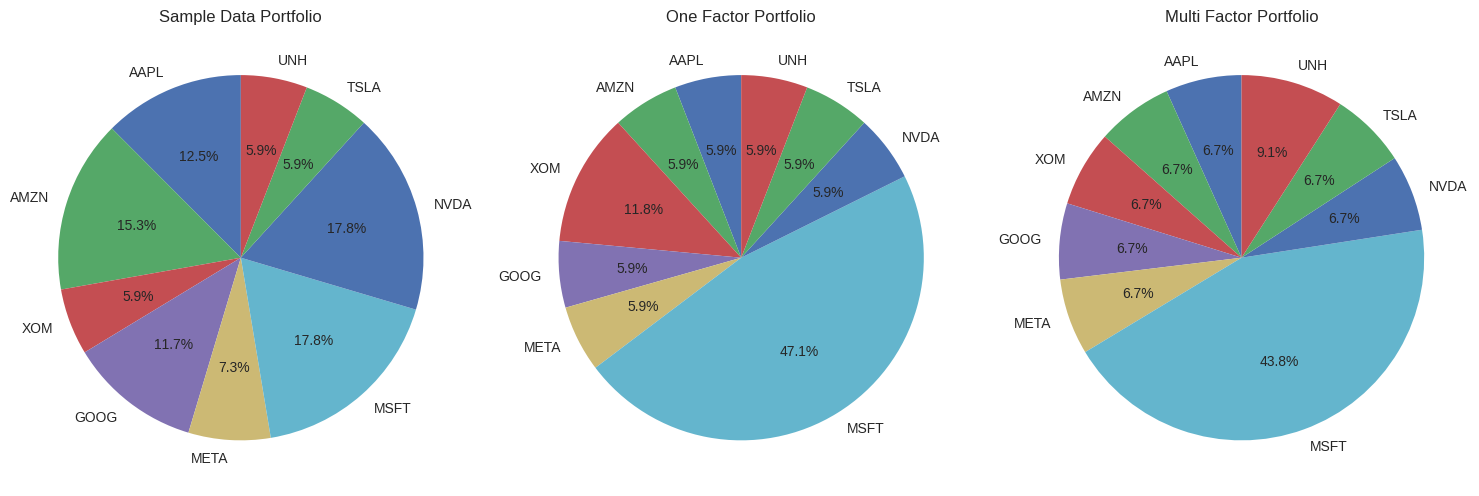

In [1175]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Define data
labels = MV.index.tolist()[:-3]  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from labels
sample_data_weights = optimized_weights_sample_data[:-3]  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights
one_factor_weights = optimized_weights_one_factor[:-3]  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights
multi_factor_weights = optimized_weights_multi_factor[:-3]  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights

# Create pie chart
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Sample Data portfolio
ax[0].pie(sample_data_weights, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Sample Data Portfolio')

# One Factor portfolio
ax[1].pie(one_factor_weights, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1].set_title('One Factor Portfolio')

# Multi Factor portfolio
ax[2].pie(multi_factor_weights, labels=labels, autopct='%1.1f%%', startangle=90)
ax[2].set_title('Multi Factor Portfolio')

plt.tight_layout()
plt.show()